# Polynomial regression

In [1]:
import numpy as np
import sklearn 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.preprocessing

Generate a training set and a test set. For each data point a value for x is chosen randomly in [0,1]. Then its y value is computed as $1.5x^2-2x+1$ perturbed by a small additive random noise term.

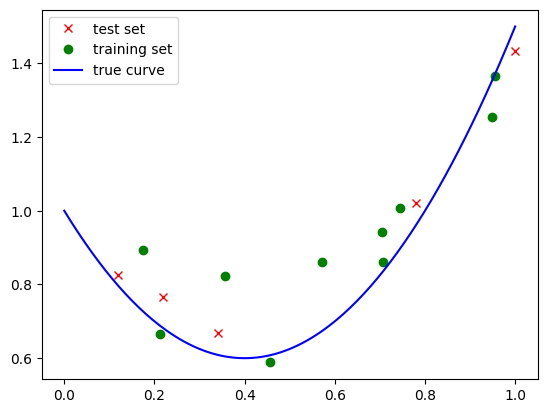

In [2]:
true_function = np.vectorize(lambda x:(2.5*x**2-2*x+1))

def draw_points(number):
  x = np.random.random(number)
  noise = np.random.normal(scale=0.1,size=number)
  y = true_function(x) + noise
  return x,y

training_size = 10
training_x, training_y = draw_points(training_size)

test_size = 5
test_x, test_y = draw_points(test_size)

xx=np.linspace(0,1,200)
yy_true=true_function(xx)
plt.plot(test_x,test_y,"rx",label="test set")
plt.plot(training_x,training_y,"go",label="training set")
plt.plot(xx,yy_true,"b-",label="true curve")
plt.legend()
plt.show()

Now, scikit learn is applied to find polynomials that fit the training set best.

In [3]:
max_degree = 6

estimate_poly = [None for degree in range(max_degree)]
poly = [None for degree in range(max_degree)]

for degree in range(max_degree):
  poly[degree] = sklearn.preprocessing.PolynomialFeatures(degree=degree)
  estimate_poly[degree] = sklearn.linear_model.LinearRegression()
  estimate_poly[degree].fit(poly[degree].fit_transform(training_x.reshape(-1,1)),training_y)

The function predict(x,d) uses the polynomial with degree d to predict the y value for x.

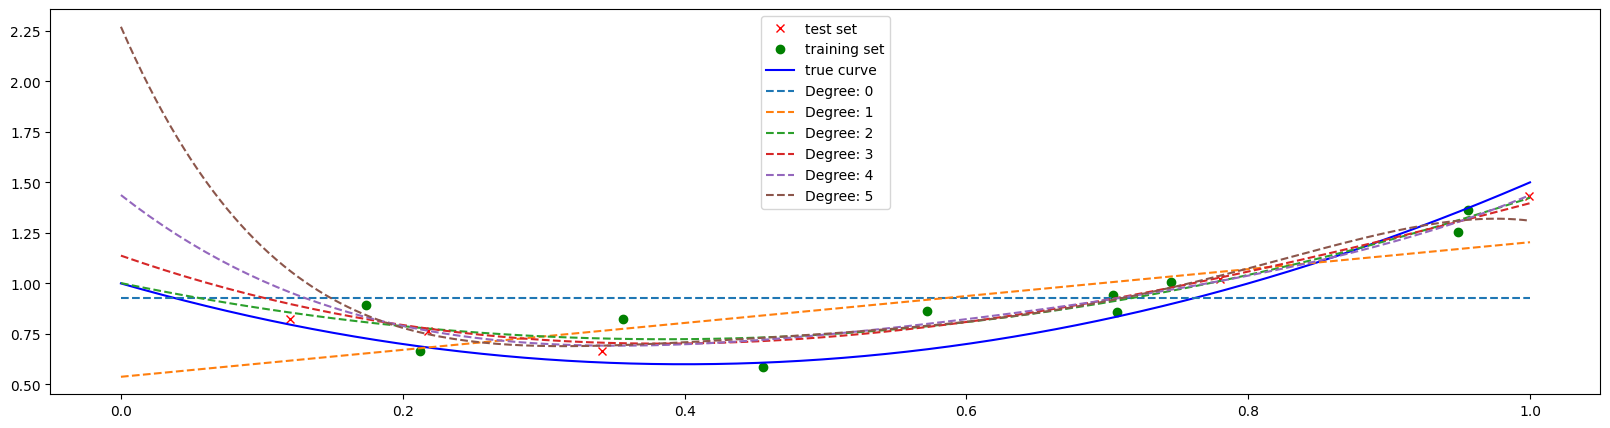

In [4]:
predict = lambda x,degree : estimate_poly[degree].predict(poly[degree].transform(x.reshape(-1,1)))


plt.figure(figsize=(20,5))
plt.plot(test_x,test_y,"rx",label="test set")
plt.plot(training_x,training_y,"go",label="training set")
plt.plot(xx,yy_true,"b-",label="true curve")
for degree in range(max_degree):
  plt.plot(xx,predict(xx,degree),"--",label="Degree: {}".format(degree))
plt.legend()
plt.show()

# <font color='red'>TODO:</font>  Compute the training error and test error.

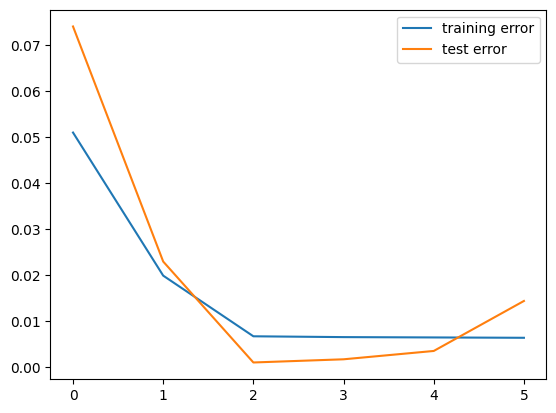

In [7]:
training_error = [0 for degree in range(max_degree)]
test_error = [0 for degree in range(max_degree)]

for degree in range(max_degree):
    training_error[degree] = sum((training_y - predict(training_x,degree))**2) / len(training_x)
    test_error[degree] = sum((test_y - predict(test_x,degree))**2) / len(test_x)

plt.plot(range(max_degree),training_error,label="training error")
plt.plot(range(max_degree),test_error,label="test error")
plt.legend()
plt.show()